In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [74]:
dados = pd.read_csv('emp_automovel.csv')

In [75]:
dados.head()

,receita_cliente,anuidade_emprestimo,anos_casa_propria,telefone_trab,avaliacao_cidade,score_1,score_2,score_3,score_social,troca_telefone,inadimplente
0,12600.0,3569.400000,12.157324,1,2.0,0.057153,0.527227,0.513171,0.117428,2545.0,0
1,9000.0,2722.188351,7.000000,0,2.0,0.657661,0.285898,0.614414,0.222700,495.0,0
2,15750.0,4477.500000,12.000000,0,2.0,0.501213,0.695423,0.513171,0.117428,1212.0,0
3,9000.0,1309.050000,12.157324,0,3.0,0.501213,0.155973,0.513171,0.117428,515.0,0
4,7650.0,1125.000000,12.157324,0,2.0,0.294328,0.152076,0.513171,0.117428,162.0,0


In [88]:
num_inadimplentes = dados['inadimplente'].value_counts()[1]
print("Número de inadimplentes:", num_inadimplentes)


Número de inadimplentes: 4716


In [76]:
x = dados.drop('inadimplente', axis=1)
y = dados['inadimplente']

In [89]:
modelo = RandomForestClassifier(max_depth=10, random_state=1)
x, x_test, y, y_test = train_test_split(x, y, test_size=0.2)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)

In [90]:
modelo.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=1)

In [91]:
print(f'Train score: {modelo.score(x_train, y_train)}')
print(f'Validation score: {modelo.score(x_val, y_val)}')
print(f'Test score: {modelo.score(x_test, y_test)}')

Train score: 0.9202350016947237
Validation score: 0.9150474469046543
Test score: 0.9074475777295734


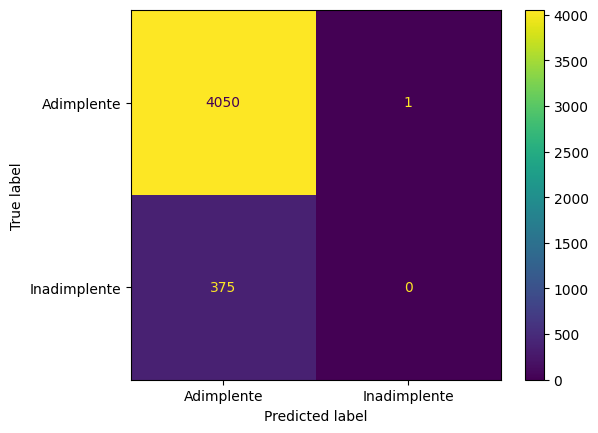

In [93]:
y_predict = modelo.predict(x_val)
cm = confusion_matrix(y_val, y_predict)  # Using 'cm' instead of 'confusion_matrix'
visualization = ConfusionMatrixDisplay(cm, display_labels=['Adimplente', 'Inadimplente'])
visualization.plot()

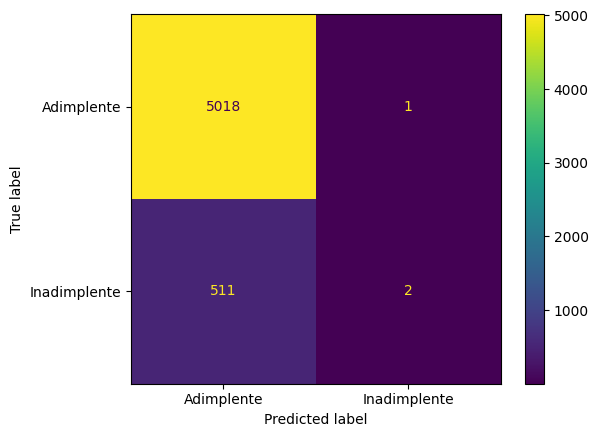

In [94]:
y_predict = modelo.predict(x_test)
cm = confusion_matrix(y_test, y_predict)  # Using 'cm' instead of 'confusion_matrix'
visualization = ConfusionMatrixDisplay(cm, display_labels=['Adimplente', 'Inadimplente'])
visualization.plot()